In [79]:
#importing all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns




In [80]:
#loading the data
df = pd.read_csv("/Users/rahmaabdullahi/Documents/Streamlit/streamlit_env/MLproj/listingsbefore.csv")

In [81]:
#Dropping Variables 
df2 = df.drop(['host_since','host_location','host_identity_verified','neighbourhood_cleansed','room_type','bathrooms_text','has_availability', "review_scores_cleanliness", "review_scores_checkin", 'review_scores_communication', 'review_scores_location', 'reviews_per_month'],axis=1)

In [14]:
df2.head()

,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_groups
0,2613,1.0,0.97,1,1,t,1,1.0,110,3,89,13,320,207,4.99,t,South Side
1,17928,1.0,0.96,2,2,t,2,1.0,91,2,60,11,320,459,4.68,f,West Side
2,33004,1.0,0.99,9,82,t,4,2.0,157,4,180,4,137,56,4.63,t,North Side
3,46734,1.0,0.89,1,1,t,3,1.0,329,2,7,21,165,13,5.00,f,North Side
4,101521,0.9,0.77,8,12,t,3,1.0,86,32,395,0,306,40,4.28,f,North Side


In [82]:
df2["price"] = df["price"].fillna(0)
df2['price'] = df2['price'].astype(int)


In [83]:
le = LabelEncoder()
df2['neighbourhood_groups1']= le.fit_transform(df2['neighbourhood_groups'])

In [18]:
df2.head()

,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_groups,neighbourhood_groups1
0,2613,1.0,0.97,1,1,t,1,1.0,110,3,89,13,320,207,4.99,t,6,6
1,17928,1.0,0.96,2,2,t,2,1.0,91,2,60,11,320,459,4.68,f,8,8
2,33004,1.0,0.99,9,82,t,4,2.0,157,4,180,4,137,56,4.63,t,4,4
3,46734,1.0,0.89,1,1,t,3,1.0,329,2,7,21,165,13,5.00,f,4,4
4,101521,0.9,0.77,8,12,t,3,1.0,86,32,395,0,306,40,4.28,f,4,4


In [84]:
df2["price_mean"] = (df2["price"] >= df2["price"].mean()) * 1


In [96]:
df2.head()

,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,neighbourhood_groups,price_mean
0,2613,1.0,0.97,1,1,1,1.0,110,3,89,13,320,207,4.99,6,0
1,17928,1.0,0.96,2,2,2,1.0,91,2,60,11,320,459,4.68,8,0
2,33004,1.0,0.99,9,82,4,2.0,157,4,180,4,137,56,4.63,4,0
3,46734,1.0,0.89,1,1,3,1.0,329,2,7,21,165,13,5.00,4,1
4,101521,0.9,0.77,8,12,3,1.0,86,32,395,0,306,40,4.28,4,0


In [85]:
df2["price_mean"].unique()

array([0, 1])

In [86]:
df2.fillna(0)

,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_groups,neighbourhood_groups1,price_mean
0,2613,1.00,0.97,1,1,t,1,1.0,110,3,89,13,320,207,4.99,t,South Side,6,0
1,17928,1.00,0.96,2,2,t,2,1.0,91,2,60,11,320,459,4.68,f,West Side,8,0
2,33004,1.00,0.99,9,82,t,4,2.0,157,4,180,4,137,56,4.63,t,North Side,4,0
3,46734,1.00,0.89,1,1,t,3,1.0,329,2,7,21,165,13,5.00,f,North Side,4,1
4,101521,0.90,0.77,8,12,t,3,1.0,86,32,395,0,306,40,4.28,f,North Side,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,22094147,0.99,0.98,169,183,t,2,1.0,62,1,1125,0,0,6,3.67,f,West Side,8,0
7410,30147879,0.00,1.00,1,1,t,6,2.0,95,30,90,0,0,4,5.00,f,West Side,8,0
7411,447662042,1.00,1.00,7,7,t,6,2.0,321,2,26,0,0,4,5.00,f,West Side,8,1
7412,124980082,0.00,0.67,1,1,t,4,2.0,150,3,1125,0,0,5,4.80,f,Far North Side,1,0


In [87]:
df2=df2.dropna()

In [58]:
df2.isna().sum()

host_id                      0
host_response_rate           0
host_acceptance_rate         0
host_listings_count          0
host_total_listings_count    0
host_has_profile_pic         0
accommodates                 0
bedrooms                     0
price                        0
minimum_nights               0
maximum_nights               0
availability_30              0
availability_365             0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
neighbourhood_groups         0
neighbourhood_groups1        0
price_mean                   0
dtype: int64

In [88]:
#split dataset in features and target variable
feature_cols = ['host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'bedrooms',
 'number_of_reviews',
 'neighbourhood_groups1']
X = df2[feature_cols] # Features
y = df2.price_mean # Target variable

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 2/7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [90]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [91]:
# Model evaluation using the Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[951, 101],
       [208, 259]])

In the output, 954 and 240 are actual predictions, and 214 and 111 are incorrect predictions.

Text(0.5, 427.9555555555555, 'Predicted label')

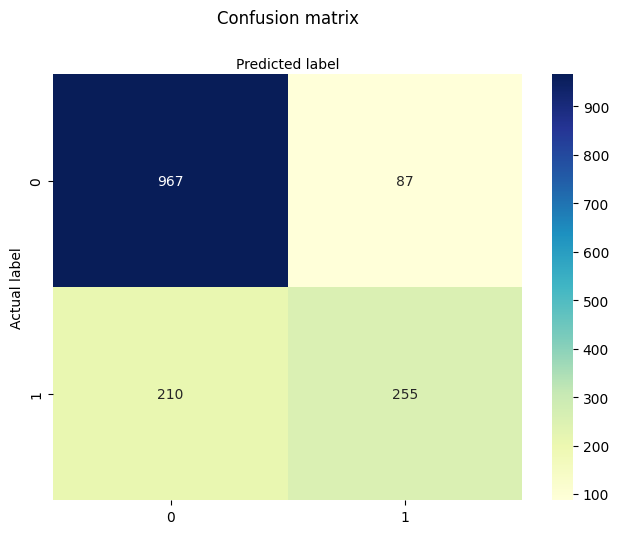

In [74]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [75]:
#Confusion Matrix Evaluation Metrics

target_names = ['below mean', 'above mean']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

  below mean       0.82      0.92      0.87      1054
  above mean       0.75      0.55      0.63       465

    accuracy                           0.80      1519
   macro avg       0.78      0.73      0.75      1519
weighted avg       0.80      0.80      0.79      1519



classification rate of 80%, considered as good accuracy.

AUC score for the case is 0.83. The model is capable of distiguishing between ( 0 & 1 ) classes. 


In [ ]:
#Accuracy 

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

In [71]:
print('Precision: %.3f' % precision_score(y_test, y_pred))


Precision: 0.746


In [67]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.548


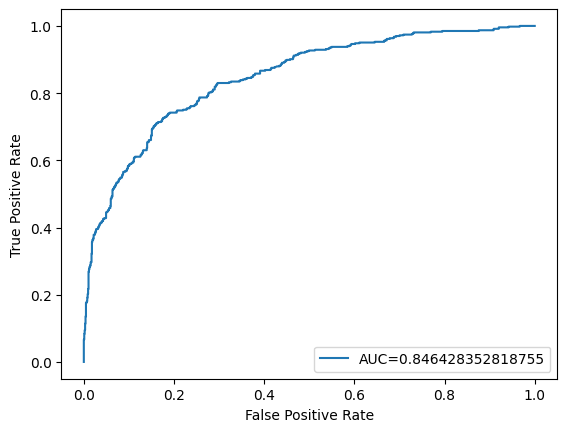

In [73]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()